In [1]:
#import libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#use pandas to import the datafiles and display it
N_uptake_file = pd.read_csv('Reach1_N_blank.csv')
display(N_uptake_file)

,Reach,Sample,Injection,Date_collected,Time_collected,Cl mg/L,N-NO3 mg/L
0,1,Bottom BG1,N,1/17/19,9:30:00,0.61,0.00
1,1,Top BG1,N,1/17/19,9:35:00,0.64,0.00
2,1,1,N,1/17/19,10:20:30,0.60,0.00
3,1,2,N,1/17/19,10:21:22,0.59,0.00
4,1,3,N,1/17/19,10:22:59,1.41,0.07
5,1,4,N,1/17/19,10:23:09,7.31,0.39
6,1,5,N,1/17/19,10:23:14,13.38,0.70
7,1,6,N,1/17/19,10:23:20,25.71,1.29
8,1,7,N,1/17/19,10:23:25,35.83,1.84
9,1,8,N,1/17/19,10:23:29,45.75,2.36


In [3]:
#Background corrections of N-NO3 mg/L and Cl mg/L
Cl_background_mean = (0.61+0.64+0.65+0.62)/4
N_NO3_background_mean = (0+0+0+0)/4

print('Corrected Cl background mean is',Cl_background_mean)
print('Corrected NO3 background mean is',N_NO3_background_mean)

Corrected_Cl = (N_uptake_file['Cl mg/L']-Cl_background_mean)
Corrected_NO3 = (N_uptake_file['N-NO3 mg/L']-N_NO3_background_mean)

Corrected_Cl[2:-2] #Corrected Cl mg/L removing row 0-1 and 22-23 background values
Corrected_NO3[2:-2] #Corrected N-NO3 mg/L removing row 0-1 and 22-23 background values

ratio = (((Corrected_NO3)/(Corrected_Cl))*1000)
injection=0.0543*1000
print(ratio[2:-2])

Corrected Cl background mean is 0.63
Corrected NO3 background mean is 0.0
2     -0.000000
3     -0.000000
4     89.743590
5     58.383234
6     54.901961
7     51.435407
8     52.272727
9     52.304965
10    52.490806
11    52.163027
12    52.656490
13    52.285898
14    52.683200
15    53.210202
16    50.210463
17    52.912881
18    53.945250
19    54.607509
20    58.035714
21    57.971014
dtype: float64


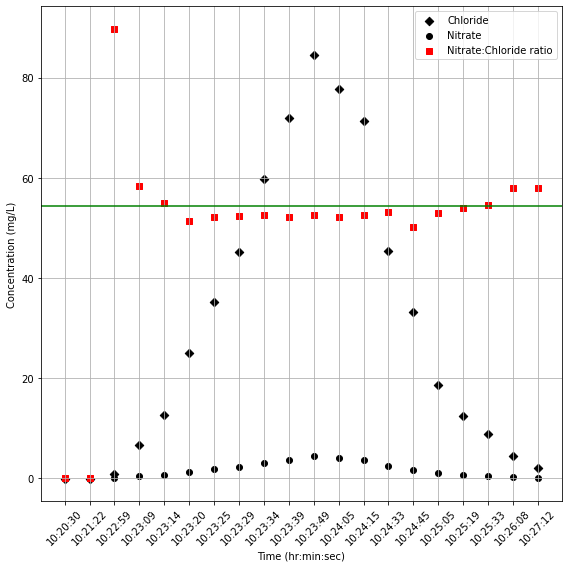

In [4]:
#Figure Part 1
fig1, ax1 = plt.subplots(figsize=(8,8))

#Define the parameters for the plot
Cl = Corrected_Cl[2:-2]
NO3 = Corrected_NO3[2:-2]
time = N_uptake_file['Time_collected'][2:-2]
tick_marks = N_uptake_file['Time_collected'][2:-2]

#Set and plot the injection, ratio, and corrected cloride and nitrate
ax1.scatter(time, Cl, color='k', marker='D', label='Chloride')
ax1.scatter(time, NO3, color='k', marker='o', label='Nitrate')
ax1.scatter(time, ratio[2:-2], color='r', marker='s', label='Nitrate:Chloride ratio')
ax1.axhline(injection, color='green')
ax1.set_ylabel('Concentration (mg/L)')
ax1.set_xlabel('Time (hr:min:sec)')
plt.xticks(tick_marks, rotation=45)
ax1.legend(loc='upper right')
plt.tight_layout()  
plt.grid()
plt.savefig('NO3-Clplot.png')
plt.show()

In [5]:
#Calculation Part 2

#Known variables
Discharge = 2.83 #units L/s
Stream_width = 0.25 #Units m
Reach_Length = 70 #Units m
N_Cl_Added = 0.0543 #Unitless
Clt = Corrected_Cl[2:-2]
Nt = Corrected_NO3[2:-2]

#Conversions
#1 mg = 1000 ug 
#60 sec = 1 min

#Equations
kw = (((Nt/Clt) - N_Cl_Added) / Reach_Length)

Sw = (-(1/kw))

N_mean = (np.sqrt(Nt*(N_Cl_Added)*Clt))

Uptake = (Discharge*((N_mean)/(Sw*Stream_width)))

Uptake_min=Uptake*60

Uptake_Rate=Uptake_min*1000
display('Uptake Rate in ug/m2 min',Uptake_Rate)

'Uptake Rate in ug/m2 min'

2     -0.000000
3     -0.000000
4    -18.725507
5    -14.901305
6     -4.066042
7     36.840129
8     36.888583
9     46.546895
10    56.062541
11    79.332017
12    72.061926
13    80.856456
14    59.883553
15    25.850167
16    68.911714
17    13.497950
18     2.313772
19    -1.428143
20    -9.115886
21    -4.136771
dtype: float64

In [6]:
#Table Part 2
data = {

"Cl mg/L": N_uptake_file['Cl mg/L'][2:-2],

"N-NO3 mg/L": N_uptake_file['N-NO3 mg/L'][2:-2],

"Corrected Chlorine": Corrected_Cl[2:-2],
    
"Corrected Nitrate": Corrected_NO3[2:-2],
    
"Kw": kw,
    
"Sw": Sw,
    
"N mean": N_mean,
    
"Uptake Rate": Uptake_Rate
}

df = pd.DataFrame(data) #Create table dataframe
display(df)

,Cl mg/L,N-NO3 mg/L,Corrected Chlorine,Corrected Nitrate,Kw,Sw,N mean,Uptake Rate
2,0.60,0.00,-0.03,0.00,-0.000776,1289.134438,-0.000000,-0.000000
3,0.59,0.00,-0.04,0.00,-0.000776,1289.134438,-0.000000,-0.000000
4,1.41,0.07,0.78,0.07,0.000506,-1974.969254,0.054450,-18.725507
5,7.31,0.39,6.68,0.39,0.000058,-17143.276140,0.376115,-14.901305
6,13.38,0.70,12.75,0.70,0.000009,-116286.644951,0.696152,-4.066042
7,25.71,1.29,25.08,1.29,-0.000041,24436.278604,1.325435,36.840129
8,35.83,1.84,35.20,1.84,-0.000029,34529.147982,1.875341,36.888583
9,45.75,2.36,45.12,2.36,-0.000029,35087.095627,2.404587,46.546895
10,60.45,3.14,59.82,3.14,-0.000026,38691.257184,3.193655,56.062541
11,72.52,3.75,71.89,3.75,-0.000031,32756.611793,3.826043,79.332017


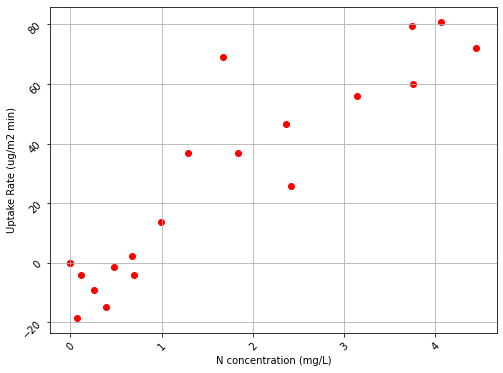

In [7]:
#Figure Part 2
#A figure comparing the uptake rate (y-axis) and the N concentration (x-axis) 
plt.figure(figsize=(8, 6))
x=N_uptake_file['N-NO3 mg/L'][2:-2]
y=Uptake_Rate
plt.scatter(x,y, color='r') 
plt.xlabel('N concentration (mg/L)')
plt.ylabel('Uptake Rate (ug/m2 min)')
plt.tick_params(labelrotation=45)
plt.grid()
plt.savefig('biogeochem5_figure.png')